#### Team No. : 13
#### Department : Computer Science & Engineering
#### Semester : V
#### Division : A
---
#### Project ID : 5DMACP09
#### Project Title : WEATHER  SHIFT PREDICTION 
---
# Problem statement :
##### The goal is to predict the temperature at a particular latitude/longitude and time, given all available measurements and climate model predictions.
---
# Team Leader :
##### Ankita Mane - 01fe19bcs052 [146]

# Team Members:
##### Muskan Havaldar - 01fe19bcs007 [164]
##### Srishti Eligar - 01fe19bcs042 [137]
##### Swathi Pardeshi - 01fe19bcs060 [153]

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# DATA PREPROCESSING

### Exploration by a Data Analysist:

In [2]:
#load train data set
train= pd.read_csv('train.csv')
train.head()

KeyboardInterrupt: 

In [3]:
#load dev_in data set
dev_in= pd.read_csv('dev_in.csv')
dev_in.head()

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,1539162000,-40.350000,-9.880000,11.0,10,tropical,-843.0,31.782490,10.070714,765.631228,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,0.505035,2.647577,2.0,2.0
1,1545006600,53.421299,-6.270070,4.0,10,mild temperate,67.0,-59.691521,7.005000,752.897615,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,-0.400024,1.249994,0.0,0.0
2,1540094400,-19.757700,63.361000,26.0,10,dry,6.0,35.250889,23.327143,763.115016,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,0.100006,21.050012,-1.0,1.0
3,1552611600,35.245899,47.009201,5.0,10,mild temperate,1390.0,-23.755615,3.109286,609.419333,...,1.69672,5.1653,0.0,0.000049,0.0,0.0,-1.500000,-0.349982,-12.0,81.0
4,1545631200,26.633333,118.150000,14.0,20,mild temperate,210.0,33.040438,12.172143,734.678037,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,0.102081,11.513879,-15.0,83.0


In [4]:
#load dev_out data set
dev_out= pd.read_csv('dev_out.csv')
dev_out.head()

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,1563124500,42.614899,-89.590401,28.0,0,snow,313.0,65.438862,19.171429,737.750555,...,0.0,0.0,0.0,0.0,0.0,0.0,2.399994,23.450006,26.0,71.0
1,1565951400,61.885201,34.154701,18.0,10,snow,34.0,40.277528,15.127857,751.846067,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.300018,9.449976,21.0,40.0
2,1563850200,38.468201,43.332298,17.0,10,snow,1652.0,-0.237116,20.117857,609.203551,...,0.0,0.0,0.0,0.0,0.0,0.0,1.849335,3.365320,0.0,0.0
3,1562806380,38.791000,-97.652199,28.0,0,snow,383.0,19.207866,33.193571,724.725255,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.486816,16.263177,0.0,0.0
4,1564509600,58.767200,-111.116997,20.0,20,snow,235.0,46.174496,19.481429,740.954837,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.200012,7.050012,-1.0,5.0


In [5]:
#print train data set shape
print("We have", train.shape[0], "users in the training set")

We have 3129592 users in the training set


In [6]:
#print dev_in data set shape
print("We have", dev_in.shape[0], "users in the dev_in (development set1) set")

We have 50000 users in the dev_in (development set1) set


In [7]:
#print dev_out data set shape
print("We have", dev_out.shape[0], "users in the dev_out (development set2) set")

We have 50000 users in the dev_out (development set2) set


In [18]:
# computing number of rows
rows = len(train.axes[0])
  
# computing number of columns
cols = len(train.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  3129592
Number of Columns:  129


In [19]:
# computing number of rows
rows = len(dev_in.axes[0])
  
# computing number of columns
cols = len(dev_in.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  50000
Number of Columns:  129


In [20]:
# computing number of rows
rows = len(dev_out.axes[0])
  
# computing number of columns
cols = len(dev_out.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  50000
Number of Columns:  129


In [10]:
#show data sets info
train.info()
dev_in.info()
dev_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129592 entries, 0 to 3129591
Columns: 129 entries, fact_time to gfs_total_clouds_cover_low_next
dtypes: float64(128), object(1)
memory usage: 3.0+ GB


### Data Visualization

Text(0.5, 0, 'climate')

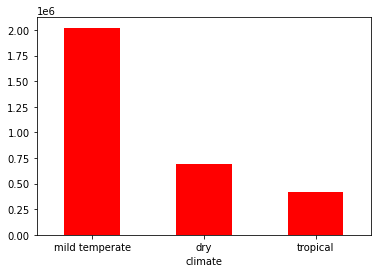

In [8]:
#climate distribution graph
train.climate.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('climate')

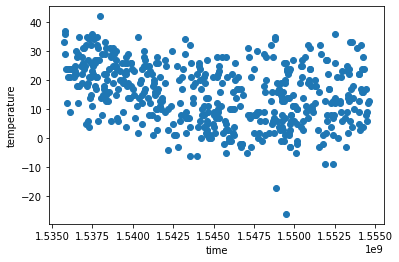

In [9]:
#fact_temp vs fact_time graph
x=train['fact_time'][:500]
y=train['fact_temperature'][:500]
#plt.figure(figsize=(20,20))
plt.rcParams['agg.path.chunksize'] = 10000
f=plt.figure()
#print(x)
plt.xlabel('time')
plt.ylabel('temperature')
#plt.plot(x,y)
plt.scatter(x, y)
plt.show()


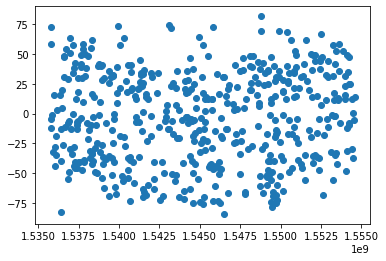

In [10]:
#sun_elevation vs fact_time graph
x=train['fact_time'][:500]
y=train['sun_elevation'][:500]
#plt.figure(figsize=(20,20))
plt.rcParams['agg.path.chunksize'] = 10000
f=plt.figure()
#print(x)

#plt.plot(x,y)
plt.scatter(x, y)
plt.show()

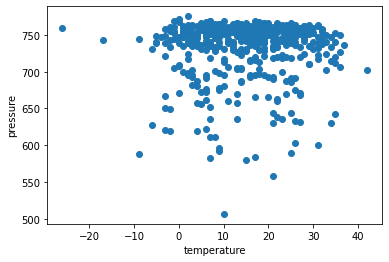

In [11]:
#climate_pressure vs fact_temp graph
x=train['fact_temperature'][:500]
y=train['climate_pressure'][:500]
#plt.figure(figsize=(20,20))
plt.rcParams['agg.path.chunksize'] = 10000
f=plt.figure()
#print(x)
plt.xlabel('temperature')
plt.ylabel('pressure')
#plt.plot(x,y)
plt.scatter(x, y)
plt.show()

### Missing values

In [24]:
#missing values evaluation in each column
miss=train.isnull().sum()
miss[miss > 0]


cmc_0_0_0_1000                     2341
cmc_0_0_0_2_grad                   2341
cmc_0_0_0_2_interpolated           2341
cmc_0_0_0_2_next                   2341
cmc_0_0_0_2                        2341
                                   ... 
cmc_0_1_68_0_next                  2341
gfs_2m_dewpoint_grad                643
gfs_2m_dewpoint_next                430
gfs_total_clouds_cover_low_grad     643
gfs_total_clouds_cover_low_next     430
Length: 114, dtype: int64

In [8]:
# Check for duplicates
train.duplicated().any()
#It returns True only for Unique elements.

True

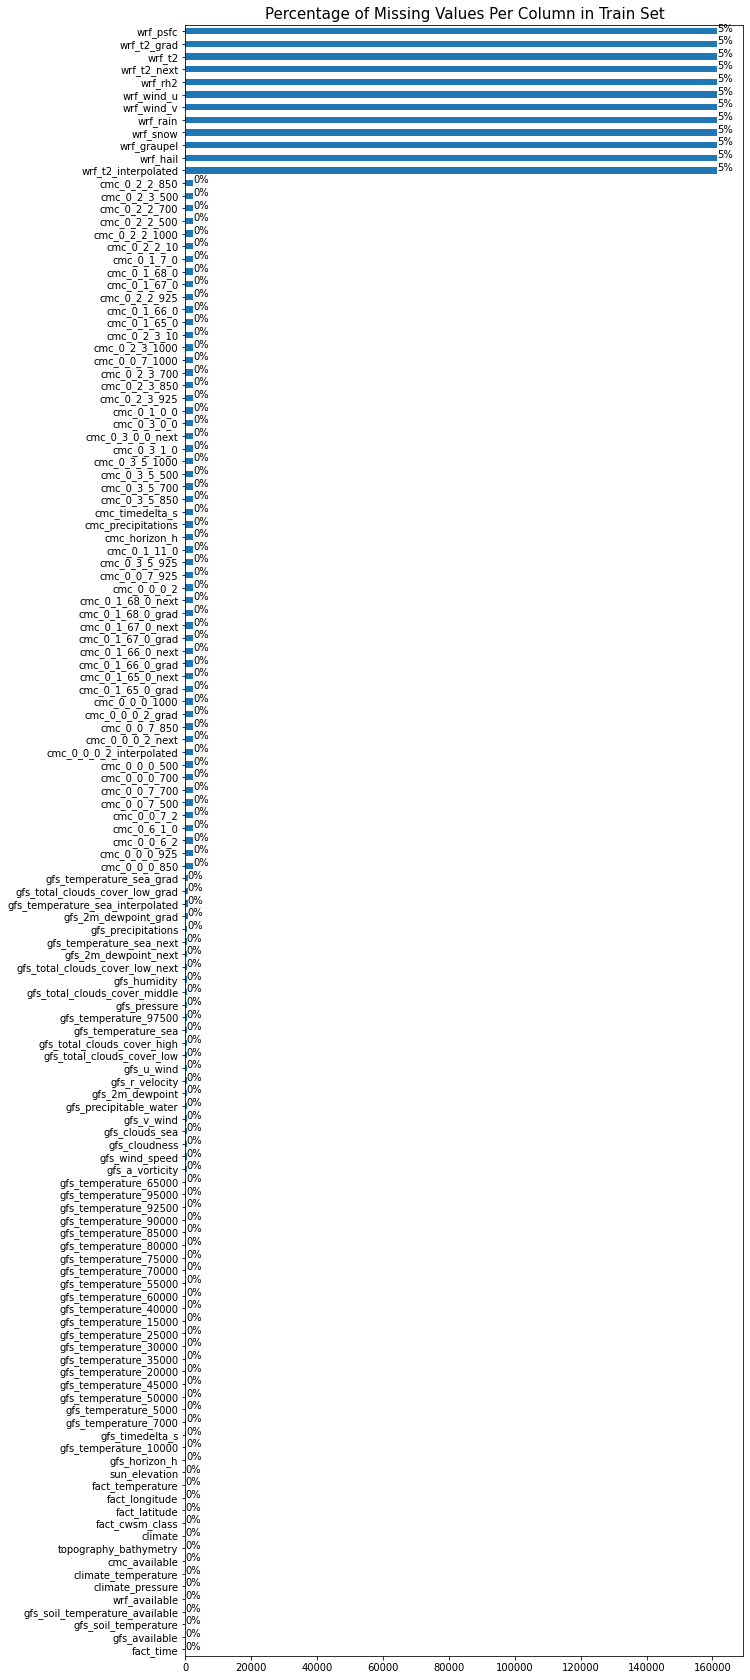

In [10]:
# Check if there any missing values in train set
mv = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 30))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in mv.patches:
    percentage ='{:.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    mv.annotate(percentage,(x,y))

### Extraction

In [5]:
# Extract features and targets, and remove redundant meta-data
X_train = train.iloc[:,6:]
X_dev_in = dev_in.iloc[:,6:]
y_train = train['fact_temperature']
y_dev_in = dev_in['fact_temperature']

In [4]:
X_train.head()

,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_0_1000,cmc_0_0_0_2_grad,cmc_0_0_0_2_interpolated,cmc_0_0_0_2_next,cmc_0_0_0_2,cmc_0_0_0_500,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,127.0,-17.526443,14.613571,754.263405,282.702881,6.684790,276.300439,282.985229,276.300439,262.333789,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.600006,-2.750006,0.0,0.0
1,297.0,41.531032,26.992143,733.117168,305.860669,-1.361548,303.629541,302.267993,303.629541,267.178882,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.600006,17.950006,-12.0,11.0
2,-1.0,43.916531,18.842143,761.571076,294.469702,0.282837,295.153361,295.341919,295.059082,268.584375,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.233978,21.450006,1.0,8.0
3,193.0,40.240955,8.303571,747.524910,295.118774,1.091162,296.376611,297.467773,296.376611,262.566675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.059448,16.150018,-58.0,41.0
4,90.0,30.394660,6.451429,753.168113,281.233203,-1.461133,282.810181,281.349048,282.810181,242.905981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.400024,3.150018,18.0,92.0


In [14]:
y_train.head()

0     2.0
1    31.0
2    17.0
3    24.0
4     9.0
Name: fact_temperature, dtype: float64

In [ ]:
X_dev_in.head()

In [ ]:
y_dev_in.head()

### Data Normalization

In [8]:
data=X_train

In [16]:
data.head()

,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_0_1000,cmc_0_0_0_2_grad,cmc_0_0_0_2_interpolated,cmc_0_0_0_2_next,cmc_0_0_0_2,cmc_0_0_0_500,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,127.0,-17.526443,14.613571,754.263405,282.702881,6.684790,276.300439,282.985229,276.300439,262.333789,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.600006,-2.750006,0.0,0.0
1,297.0,41.531032,26.992143,733.117168,305.860669,-1.361548,303.629541,302.267993,303.629541,267.178882,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.600006,17.950006,-12.0,11.0
2,-1.0,43.916531,18.842143,761.571076,294.469702,0.282837,295.153361,295.341919,295.059082,268.584375,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.233978,21.450006,1.0,8.0
3,193.0,40.240955,8.303571,747.524910,295.118774,1.091162,296.376611,297.467773,296.376611,262.566675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.059448,16.150018,-58.0,41.0
4,90.0,30.394660,6.451429,753.168113,281.233203,-1.461133,282.810181,281.349048,282.810181,242.905981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.400024,3.150018,18.0,92.0


In [9]:
#Max-min normalisation 
#range=[-1,1]
dataf=(((data-data.min())/(data.max()-data.min()))*2)-1

In [8]:
#Display data after normalization
dataf.head()

,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_0_1000,cmc_0_0_0_2_grad,cmc_0_0_0_2_interpolated,cmc_0_0_0_2_next,cmc_0_0_0_2,cmc_0_0_0_500,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,-0.335888,-0.194708,0.142718,0.744465,0.121295,0.204605,0.061452,0.190605,0.062875,0.459249,...,-0.999997,-1.0,-0.999999,-1.0,-0.999999,-1.0,-0.084577,0.346292,0.00,-1.00
1,-0.285777,0.462136,0.480900,0.638174,0.672613,-0.227362,0.642479,0.599511,0.644681,0.639207,...,-0.999997,-1.0,-0.999999,-1.0,-0.999999,-1.0,-0.044776,0.769160,-0.12,-0.78
2,-0.373618,0.488668,0.258242,0.781196,0.401428,-0.139083,0.462272,0.452638,0.462226,0.691410,...,-0.999997,-1.0,-0.999999,-1.0,-0.999999,-1.0,-0.037492,0.840659,0.01,-0.84
3,-0.316433,0.447787,-0.029671,0.710594,0.416881,-0.095688,0.488279,0.497719,0.490274,0.467899,...,-0.999997,-1.0,-0.999999,-1.0,-0.999999,-1.0,-0.031653,0.732389,-0.58,-0.18
4,-0.346794,0.338276,-0.080272,0.738959,0.086306,-0.232708,0.199852,0.155908,0.201460,-0.262345,...,-0.999997,-1.0,-0.999999,-1.0,-0.999999,-1.0,-0.024875,0.466820,0.18,0.84


heat map

In [ ]:
correlation_matrix=dataf.corr()

In [ ]:
correlation_matrix

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [18, 12]
corr_heat = sns.heatmap(correlation_matrix,annot=True)
plt.title('Variable Correlations')

# GradientBoostingRegressor

In [6]:
X_train=X_train.fillna(-9999)
X_dev_in=X_dev_in.fillna(-9999)

In [12]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import datasets
  


In [ ]:
# Setting SEED for reproducibility
SEED = 1
  
# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = SEED)
  
# Fit to training set
gbr.fit(X_train, y_train)
  

In [ ]:
# Predict on test set
pred_y = gbr.predict(X_dev_in1)

In [ ]:
# test set RMSE
test_rmse = MSE(y_dev_in1, pred_y) ** (1 / 2)
  
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))